<a href="https://colab.research.google.com/github/kram254/Optimized-Machine-Learning-Based-Cyber-Attack-Detection-Model/blob/main/cybersec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center><bold>Optimized Machine Learning-Based Cyber-Attack Detection Model for Enhanced Cybersecurity in Web-Based Systems</bold></center>**


**<bold> Optimized Machine Learning-Based Cyber-Attack Detection Model to bolster cybersecurity in web-based systems. The trip will be guided along the way of data preprocessing, exploratory analysis, and model selection and finally reach the design of powerful algorithms, which have the ability to detect and categorize cyber threats. Using the LSTM, RNN and DNN architectures, we are planning to significantly improve the detection of cyber-attack accuracy and efficiency in order to entrench the digital strongholds that shield sensitive internet data.
 </bold>**

**<center><bold>Milestone 1</bold></center>**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
file_paths = [
    'data/Friday-WorkingHours-Afternoon.csv',
    'data/Friday-WorkingHours-Afternoon-P.csv',
    'data/Friday-WorkingHours-Morning.csv',
    'data/Monday-WorkingHours.csv',
    'data/Thursday-WorkingHours-Afternoon.csv',
    'data/Thursday-WorkingHours-Morning.csv',
    'data/Tuesday-WorkingHours.csv',
    'data/Wednesday-workingHours.csv',

]

dataframes = [pd.read_csv(f) for f in file_paths]
dataset = pd.concat(dataframes, ignore_index=True)

dataset1= pd.read_csv("data/Friday-WorkingHours-Afternoon.csv")

for i, dataset in enumerate(dataframes):
    print(f"Dataset {i+1} - Shape: {dataset.shape}")
    display(dataset.head())


Dataset 1 - Shape: (225745, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 2 - Shape: (286467, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 3 - Shape: (191033, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


Dataset 4 - Shape: (529918, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 5 - Shape: (288602, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


Dataset 6 - Shape: (170366, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


Dataset 7 - Shape: (445909, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 8 - Shape: (692703, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**<bold> Data Processing</bold>**

In [ ]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

for column in dataset.columns:
    if dataset[column].dtype == np.float64 or dataset[column].dtype == np.int64:
        dataset[column].fillna(dataset[column].mean(), inplace=True)


dataset = dataset.dropna()
dataset = dataset.drop_duplicates()
dataset.reset_index(drop=True, inplace=True)
info = dataset.info()
null_values = dataset.isnull().sum()

print("```````````````````````````````````````````````````````````")
print(null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610794 entries, 0 to 610793
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0    Destination Port             610794 non-null  int32   
 1    Flow Duration                610794 non-null  int32   
 2    Total Fwd Packets            610794 non-null  int32   
 3    Total Backward Packets       610794 non-null  int32   
 4   Total Length of Fwd Packets   610794 non-null  int32   
 5    Total Length of Bwd Packets  610794 non-null  int32   
 6    Fwd Packet Length Max        610794 non-null  int16   
 7    Fwd Packet Length Min        610794 non-null  int16   
 8    Fwd Packet Length Mean       610794 non-null  float32 
 9    Fwd Packet Length Std        610794 non-null  float32 
 10  Bwd Packet Length Max         610794 non-null  int16   
 11   Bwd Packet Length Min        610794 non-null  int16   
 12   Bwd Packet Length Mean       

In [ ]:
def reduce_mem_usage(df):
    """
    Iterating through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))




    return df


dataset = reduce_mem_usage(dataset)

# display(dataset.info())
display(dataset.describe())



**<bold>Exploratory Data Analysis (EDA)</bold>**

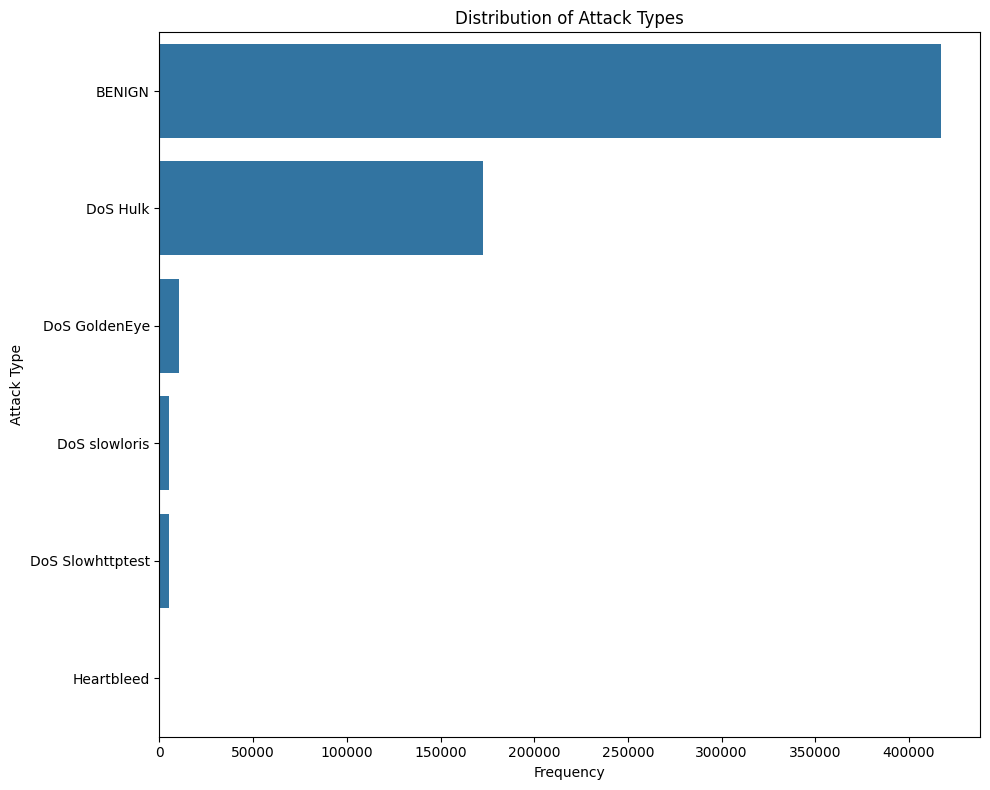

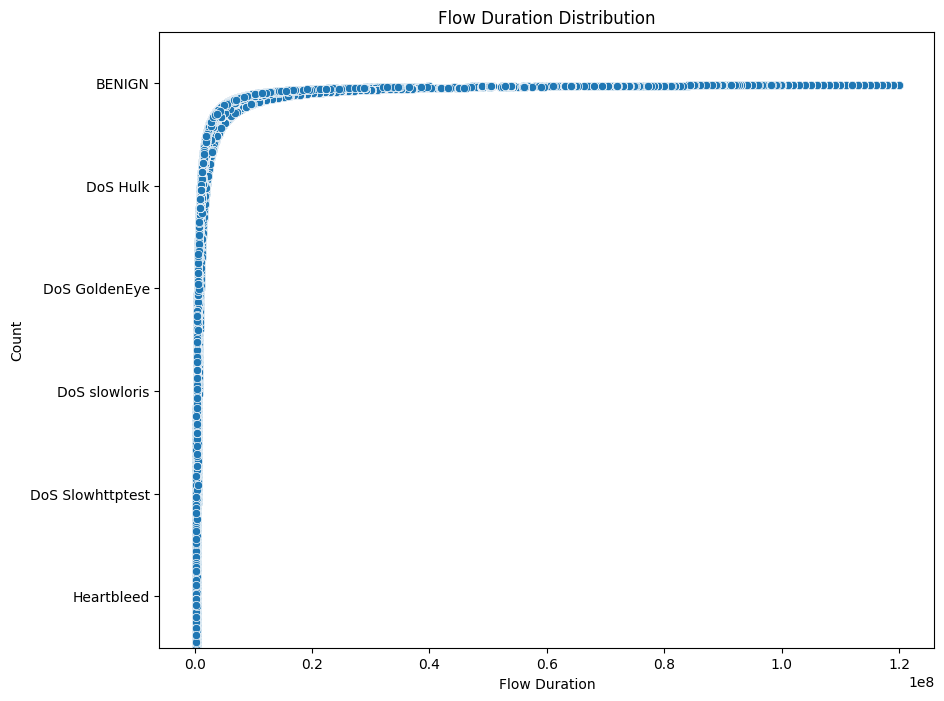

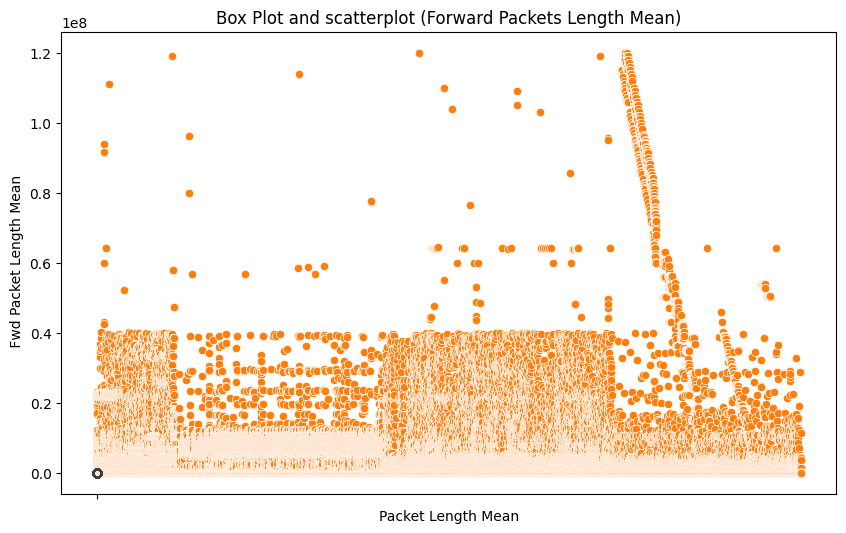

In [ ]:
attack_type_column = dataset.columns[-1]
Flow_Duration = dataset.columns[2]
Total_Fwd_Packets = dataset.columns[3]
Flow_bytes = dataset.columns[15]
Flow_pkts = dataset.columns[16]
iat_mean = dataset.columns[17]
Fwd_Pkts = dataset.columns[36]
Fwd_Pkts_Length_Mean = dataset.columns[8]

plt.figure(figsize=(10, 8))
sns.countplot(y=attack_type_column, data=dataset, order=dataset[attack_type_column].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xlabel('Frequency')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot (data=dataset, x=Flow_pkts, y=Flow_bytes)
# sns.scatterplot (dataset[Flow_Duration], data=dataset, x=Flow_pkts, y=Flow_bytes, bins=50)
sns.countplot(y=iat_mean, data=dataset, order=dataset[attack_type_column].value_counts().index)
plt.title('Flow Duration Distribution')
plt.xlabel('Flow Duration')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(dataset[Fwd_Pkts_Length_Mean])
sns.scatterplot(dataset[Flow_pkts])
plt.title('Box Plot and scatterplot (Forward Packets Length Mean)')
plt.xlabel('Packet Length Mean')
plt.show()


# # # Feature Distribution Visualization
# # features_to_plot = [Flow_Duration, Total_Fwd_Packets, Flow_bytes]

# # Plotting the distribution of the selected features
# # for feature in features_to_plot:
# plt.figure(figsize=(10, 8))
# sns.histplot(dataset[feature], kde=False, bins=50)
# plt.hist(dataset[Flow_Duration], bins=50, color='skyblue', edgecolor='black')
# plt.title(f'Distribution of {feature} fest')
# plt.xlabel(feature)
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()


Text(0.5, 1.0, 'Feature Importance')

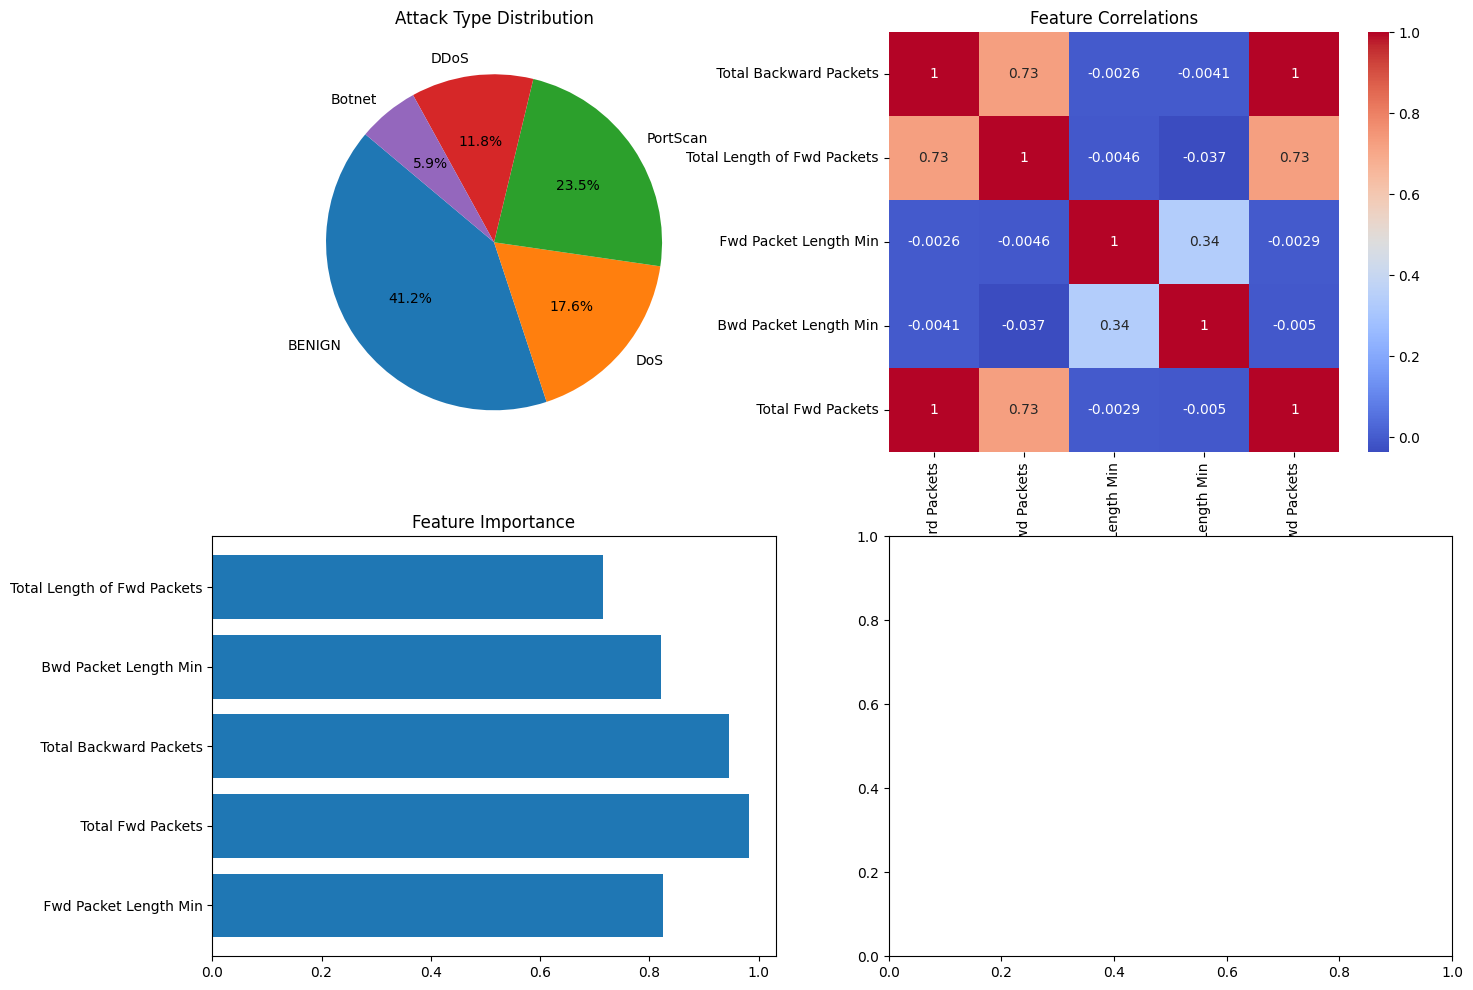

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Total_Fwd_Packets = dataset.columns[3]
Total_Bkwd_Packets = dataset.columns[4]
Fwd_Pkt_Length_Max = dataset.columns[7]
Bwd_Pkt_Length_Max = dataset.columns[11]


attack_types = ['BENIGN', 'DoS', 'PortScan', 'DDoS', 'Botnet']
attack_counts = [3500, 1500, 2000, 1000, 500]

features = [Total_Fwd_Packets, Total_Bkwd_Packets, Fwd_Pkt_Length_Max, Bwd_Pkt_Length_Max, Flow_Duration]
correlation_data = np.random.rand(5, 5)
dataset1 = pd.DataFrame(correlation_data, columns=features, index=features)
dataset_corr = dataset[features].corr()

features_importance = [Fwd_Pkt_Length_Max, Flow_Duration, Total_Fwd_Packets, Bwd_Pkt_Length_Max, Total_Bkwd_Packets]
importance_scores = np.random.rand(5)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
attack_patterns = np.random.rand(5, 4)
dataset1 = pd.DataFrame(attack_patterns, columns=attack_types[1:], index=days)

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].pie(attack_counts, labels=attack_types, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Attack Type Distribution')

sns.heatmap(dataset_corr, annot=True, cmap='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Feature Correlations')

axs[1, 0].barh(features_importance, importance_scores)
axs[1, 0].set_title('Feature Importance')

# # Temporal Patterns of Attacks
# dataset.plot(kind='bar', ax=axs[1, 1], stacked=True)
# axs[1, 1].set_title('Temporal Patterns of Attacks')
# axs[1, 1].set_ylabel('Attack Frequency')
# axs[1, 1].set_xlabel('Day of the Week')

# plt.tight_layout()
# plt.show()















**<center><bold>Milestone 2</bold></center>**

**<bold>Training</bold>.**

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

y = pd.get_dummies(dataset.iloc[:, -1]).values


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(y_train.shape[1], activation='softmax'))

rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# DNN model
dnn_model = Sequential()
dnn_model.add(Dense(50, activation='relu', input_shape=(X_train.shape[2],)))
dnn_model.add(Dense(50, activation='relu'))
dnn_model.add(Dense(y_train.shape[1], activation='softmax'))

dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()
rnn_model.summary()
dnn_model.summary()

# Training
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
dnn_history = dnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# Evaluating the model
lstm_scores = lstm_model.evaluate(X_test, y_test, verbose=0)
rnn_scores = rnn_model.evaluate(X_test, y_test, verbose=0)
dnn_scores = dnn_model.evaluate(X_test, y_test, verbose=0)

# Predictions
lstm_predictions = lstm_model.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Convert predictions to label indexes




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             25800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 6)                 306       
                                                                 
Total params: 46306 (180.88 KB)
Trainable params: 46306 (180.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 50)             6450      
                                                            

ValueError: in user code:

    File "c:\Users\admin\Downloads\New_folder\Python\CyberSecurity Model\Venv\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\admin\Downloads\New_folder\Python\CyberSecurity Model\Venv\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\admin\Downloads\New_folder\Python\CyberSecurity Model\Venv\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\admin\Downloads\New_folder\Python\CyberSecurity Model\Venv\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\admin\Downloads\New_folder\Python\CyberSecurity Model\Venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\admin\Downloads\New_folder\Python\CyberSecurity Model\Venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 78), found shape=(None, 1, 78)


In [ ]:
from sklearn.metrics import classification_report

label_names = [f'Class {i}' for i in range(y_train.shape[1])]

lstm_report = classification_report(y_test_labels, lstm_predicted_labels, target_names=label_names)
print('LSTM Model Classification Report:')
print(lstm_report)

rnn_report = classification_report(y_test_labels, rnn_predicted_labels, target_names=label_names)
print('RNN Model Classification Report:')
print(rnn_report)

dnn_report = classification_report(y_test_labels, dnn_predicted_labels, target_names=label_names)
print('DNN Model Classification Report:')
print(dnn_report)